In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import pickle
import json

In [4]:
plot = pd.read_csv('data.csv')
count = 0

In [5]:
df = pd.read_csv('data.csv')
df['IsDefaulter'] =df['default.payment.next.month']
df = df.drop('default.payment.next.month', axis=1).iloc[:5000]
X = df.drop('IsDefaulter', axis=1)
y = df['IsDefaulter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# sns.relplot(data=plot, x = 'EDUCATION', y = 'LIMIT_BAL', hue='SEX', legend=True)
# plt.savefig(f"./images/plots/{count}.png")
# count+=1
# plt.show()
# sns.lineplot(data=plot, x="SEX", y = "default.payment.next.month", palette="Spectral")
# sns.lineplot(data=plot, x = 'AGE', y = 'LIMIT_BAL', hue='SEX', palette='flare')
# plt.savefig(f"./images/plots/{count}.png")
# count+=1
# plt.show()
# sns.displot(data=plot, x="MARRIAGE", y="LIMIT_BAL", palette='viridis', hue="EDUCATION")
# plt.savefig(f"./images/plots/{count}.png")
# count+=1
# plt.show()
# sns.relplot(data=df, x="BILL_AMT1", y="PAY_AMT1", hue='EDUCATION', palette='rocket_r')
# plt.savefig(f"./images/plots/{count}.png")
# count+=1
# plt.show()
# sns.displot(data=df, x="AGE", y="BILL_AMT4", hue="SEX", palette='icefire')
# plt.savefig(f"./images/plots/{count}.png")
# count+=1
# plt.show()

In [7]:


# # Rename the target variable for clarity
# plot['IsDefaulter'] = plot['default.payment.next.month']
# plot = plot.drop('default.payment.next.month', axis=1)

# # Set different color palettes
# sns.set_palette('muted')
# palette1 = 'viridis'
# palette2 = 'coolwarm'
# palette3 = 'crest'
# palette4 = 'mako'
# palette5 = 'rocket'
# palette6 = 'magma'
# palette7 = 'icefire'

# # Distribution Plots
# plt.figure(figsize=(8, 6))
# sns.histplot(plot['LIMIT_BAL'], kde=True, color=sns.color_palette(palette1)[2])
# plt.title('Distribution of Credit Limit (LIMIT_BAL)')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.histplot(plot['AGE'], kde=True, color=sns.color_palette(palette2)[2])
# plt.title('Distribution of Age')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.histplot(plot['BILL_AMT1'], kde=True, color=sns.color_palette(palette3)[2])
# plt.title('Distribution of Bill Amount for Month 1 (BILL_AMT1)')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()


# # Count Plots
# plt.figure(figsize=(8, 6))
# sns.countplot(data=plot, x='SEX', palette=palette5)
# plt.title('Count of Gender (SEX)')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.countplot(data=plot, x='EDUCATION', palette=palette6)
# plt.title('Count of Education Levels')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.countplot(data=plot, x='MARRIAGE', palette=palette7)
# plt.title('Count of Marital Status')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.countplot(data=plot, x='IsDefaulter', palette=palette1)
# plt.title('Count of Default Payments')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# # Correlation Heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(plot.corr(), annot=True, fmt=".2f", cmap=palette2)
# plt.title('Correlation Heatmap')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# # Box Plots
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=plot, x='SEX', y='LIMIT_BAL', palette=palette3)
# plt.title('Credit Limit by Gender')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.boxplot(data=plot, x='EDUCATION', y='LIMIT_BAL', palette=palette4)
# plt.title('Credit Limit by Education Level')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.boxplot(data=plot, x='MARRIAGE', y='LIMIT_BAL', palette=palette5)
# plt.title('Credit Limit by Marital Status')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# plt.figure(figsize=(8, 6))
# sns.boxplot(data=plot, x='IsDefaulter', y='LIMIT_BAL', palette=palette6)
# plt.title('Credit Limit by Default Payment Status')
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()

# # Pair Plot
# sns.pairplot(plot[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'IsDefaulter']], hue='IsDefaulter', palette=palette7)
# plt.savefig(f"./images/plots/{count}")
# count += 1
# plt.show()


In [8]:
# for clf in [svm_clf, gnb_clf, tree_clf, forest_clf, bag_clf]:
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)
#     print(clf, accuracy_score(y_pred, y_test), precision_score(y_pred, y_test))

In [9]:
# SVM hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf']
}

svm_gridSearch = RandomizedSearchCV(SVC(probability=True), param_grid, verbose=3, refit=True)
svm_gridSearch.fit(X_train, y_train)
pickle.dump(svm_gridSearch, open('./savedModels/tunedModels/svm.pkl', 'wb+'))

# with open('./savedModels/svm.pkl', 'rb') as file:
#     svm_gridSearch = pickle.load(file)
# file.close()

svm_gridSearchPred = svm_gridSearch.predict(X_test)

dictionary = {
    'svm' : {
        'accuracy_score': accuracy_score(y_test, svm_gridSearchPred),
        'precision_score': precision_score(y_test, svm_gridSearchPred)
    }
}



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   4.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   4.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   4.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   3.9s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   4.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=   3.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=   3.5s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=   3.5s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=   3.3s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=   3.6s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.775 total time=   3.9s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;

/home/balaji/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)
pickle.dump(svm_gridSearch, open('./savedModels/basicModels/svm.pkl', 'wb+'))
y_pred = svm_clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.793


In [11]:
# Gaussian Naive Bayes Hyperparameter tuning
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_gridSearch = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=10,
                 verbose=3, 
                 refit=True) 
nb_gridSearch.fit(X_train, y_train)
pickle.dump(nb_gridSearch, open('./savedModels/tunedModels/gnb.pkl', 'wb+'))


nb_gridSearchPred = nb_gridSearch.predict(X_test)

dictionary.update({'gnb': {
    'accuracy_score': accuracy_score(y_test, nb_gridSearchPred),
    'precision_score': precision_score(y_test, nb_gridSearchPred)
}})

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END ................var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 2/10] END ................var_smoothing=1.0;, score=0.772 total time=   0.0s
[CV 3/10] END ................var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 4/10] END ................var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 5/10] END ................var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 6/10] END ................var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 7/10] END ................var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 8/10] END ................var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 9/10] END ................var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 10/10] END ...............var_smoothing=1.0;, score=0.775 total time=   0.0s
[CV 1/10] END .var_smoothing=0.8111308307896871;, score=0.775 total time=   0.0s
[CV 2/10] END .var_smoothing=0.8111308307896

/home/balaji/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
pickle.dump(nb_classifier, open('./savedModels/basicModels/gnb.pkl', 'wb+'))
# print(accuracy_score(y_test, nb_classifier.predict(X_test)))

In [13]:
# Decision Tree Hyper Paramter Tuning
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dtc_gridSearch = GridSearchCV(estimator=DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1
                        )
dtc_gridSearch.fit(X_train, y_train)
pickle.dump(dtc_gridSearch, open('./savedModels/tunedModels/dtc.pkl', 'wb+'))
dtc_gridSearchPred = dtc_gridSearch.predict(X_test)
dictionary.update({'dtc': {
    'accuracy_score': accuracy_score(y_test, dtc_gridSearchPred),
    'precision_score': precision_score(y_test, dtc_gridSearchPred)
}})

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pickle.dump(dtc, open('./savedModels/basicModels/dtc.pkl', 'wb+'))
# y_dtcPred = dtc.predict(X_test)
# print(accuracy_score(y_test, y_dtcPred))

In [15]:
# Random Forest Hyperparameter tuning

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

randomForest_gridSearch = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, refit=True, verbose=3) 
randomForest_gridSearch.fit(X_train, y_train)
pickle.dump(randomForest_gridSearch, open('./savedModels/tunedModels/rfc.pkl', 'wb+'))
randomForest_gridSearchPred = randomForest_gridSearch.predict(X_test)

dictionary.update({'rfc': {
    'accuracy_score': accuracy_score(y_test, randomForest_gridSearchPred),
    'precision_score': precision_score(y_test, randomForest_gridSearchPred)
}})

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.776 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.782 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.779 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.777 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=25;, score=0.775 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.775 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.775 total time=   0.2s
[CV 3/5] END max_depth=3, max_features=sqrt, max_leaf_nodes=3, n_estimators=50;, score=0.784 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=sq

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pickle.dump(rfc, open('./savedModels/basicModels/rfc.pkl', 'wb+'))
# y_rfcPredict = rfc.predict(X_test)
# print(accuracy_score(y_test, y_rfcPredict))

In [17]:
# Voting classifier hyperparameter tuning
vc_gridSearch = VotingClassifier(
    estimators=[('svm', svm_gridSearch), ('naiveBayes', nb_gridSearch), ('DecisionTreeClassifier', dtc_gridSearch), ('RandomForestClassifier', randomForest_gridSearch)],
    voting='soft'
)

vc_gridSearch.fit(X_train, y_train)
pickle.dump(vc_gridSearch, open('./savedModels/tunedModels/vc.pkl', 'wb+'))
vc_gridSearchPred = vc_gridSearch.predict(X_test)

dictionary.update({'vc': {
    'accuracy_score': accuracy_score(y_test, vc_gridSearchPred),
    'precision_score': precision_score(y_test, vc_gridSearchPred)
}})

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.776 total time=   4.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.776 total time=   4.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.775 total time=   4.7s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.775 total time=  12.8s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.775 total time=  16.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=  11.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=  11.4s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=  11.5s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=  10.2s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.775 total time=  11.2s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.775 total time=  11.4s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;

/home/balaji/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
vc = VotingClassifier(estimators=[('svm_clf', SVC()), ('gnb_clf', GaussianNB()), ('tree_clf', DecisionTreeClassifier()
)], voting='soft', n_jobs=-1)
vc.fit(X_train, y_train)
pickle.dump(vc, open('./savedModels/basicModels/vc.pkl', 'wb+'))
# y_vcPred = vc.predict(X_test)
# print(accuracy_score(y_test, y_vcPred))

In [19]:
# Bagging Classifier

bag_clf_tuned=BaggingClassifier(DecisionTreeClassifier(splitter='random',max_leaf_nodes=60,max_depth=50),
                                n_estimators=1000,bootstrap=True,
                                oob_score=True)
bag_clf_tuned.fit(X_train,y_train)
pickle.dump(bag_clf_tuned, open('./savedModels/tunedModels/bc.pkl', 'wb+'))
bagging_yPred = bag_clf_tuned.predict(X_test)
dictionary.update({'bc': {
    'accuracy_score': accuracy_score(y_test, bagging_yPred),
    'precision_score': precision_score(y_test, bagging_yPred)
}})

In [20]:
bag_clf=BaggingClassifier(DecisionTreeClassifier())
bag_clf.fit(X_train,y_train)
pickle.dump(bag_clf, open('./savedModels/basicModels/bc.pkl', 'wb+'))
# bagging_yPred = bag_clf.predict(X_test)
# print(f"accuracy of bagging is :{accuracy_score(bagging_yPred,y_test)}")

In [21]:
# Ada Boost Classifier

ada_clf_tuned=AdaBoostClassifier(
		DecisionTreeClassifier(splitter='random',max_leaf_nodes=60,max_depth=3),
		n_estimators=500,algorithm='SAMME',learning_rate=.3
  		)
ada_clf_tuned.fit(X_train,y_train)
pickle.dump(ada_clf_tuned, open('./savedModels/tunedModels/abc.pkl', 'wb+'))
adaTuned_yPred = ada_clf_tuned.predict(X_test)
dictionary.update({'abc': {
    'accuracy_score': accuracy_score(y_test, adaTuned_yPred),
    'precision_score': precision_score(y_test, adaTuned_yPred)
}})

In [22]:
ada_clf=AdaBoostClassifier(DecisionTreeClassifier())
ada_clf.fit(X_train,y_train)
pickle.dump(ada_clf, open('./savedModels/basicModels/abc.pkl', 'wb+'))
# ada_yPred = ada_clf.predict(X_test)
# print(f"Accuracy of adaboosting is :{accuracy_score(ada_yPred,y_test)}")

In [23]:
# Gradient Boosting Classifier
gbc_tuned = GradientBoostingClassifier(
		n_estimators=500,max_depth=5,learning_rate=.1,max_leaf_nodes=30
)
gbc_tuned.fit(X_train,y_train)
pickle.dump(gbc_tuned, open('./savedModels/tunedModels/gbc.pkl', 'wb+'))
gradient_yPred=gbc_tuned.predict(X_test)
dictionary.update({'gbc': {
    'accuracy_score': accuracy_score(y_test, gradient_yPred),
    'precision_score': precision_score(y_test, gradient_yPred)
}})

In [24]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pickle.dump(gbc, open('./savedModels/basicModels/gbc.pkl', 'wb+'))
# gradient_yPred=gbc.predict(X_test)
# print(f"accuracy is :{accuracy_score(gradient_yPred,y_test)}")

In [25]:
# Voting with Boosting
final_voting=VotingClassifier(
	estimators=[('gaus',GaussianNB()),('desi',DecisionTreeClassifier()),('knn',KNeighborsClassifier(n_neighbors=17)),
             ('bag',BaggingClassifier(DecisionTreeClassifier(splitter='random',max_leaf_nodes=60,max_depth=50),n_estimators=1000,bootstrap=True,oob_score=True)),
             ('ada',AdaBoostClassifier(DecisionTreeClassifier(splitter='random',max_leaf_nodes=60,max_depth=1),n_estimators=500,algorithm='SAMME',learning_rate=.5))
             ],voting='soft'
)
final_voting.fit(X_train,y_train)
pickle.dump(final_voting, open('./savedModels/tunedModels/fv.pkl', 'wb+'))
votingBoost_yPred = final_voting.predict(X_test)
dictionary.update({'fv': {
    'accuracy_score': accuracy_score(y_test, votingBoost_yPred),
    'precision_score': precision_score(y_test, votingBoost_yPred)
}})

In [26]:
print(dictionary)

{'svm': {'accuracy_score': 0.793, 'precision_score': 0.0}, 'gnb': {'accuracy_score': 0.793, 'precision_score': 0.0}, 'dtc': {'accuracy_score': 0.829, 'precision_score': 0.6875}, 'rfc': {'accuracy_score': 0.83, 'precision_score': 0.6947368421052632}, 'vc': {'accuracy_score': 0.793, 'precision_score': 0.0}, 'bc': {'accuracy_score': 0.832, 'precision_score': 0.672566371681416}, 'abc': {'accuracy_score': 0.824, 'precision_score': 0.6597938144329897}, 'gbc': {'accuracy_score': 0.816, 'precision_score': 0.5877862595419847}, 'fv': {'accuracy_score': 0.749, 'precision_score': 0.3932038834951456}}


In [27]:
with open("sample.json", "w") as outfile:
    json.dump(dictionary, outfile)

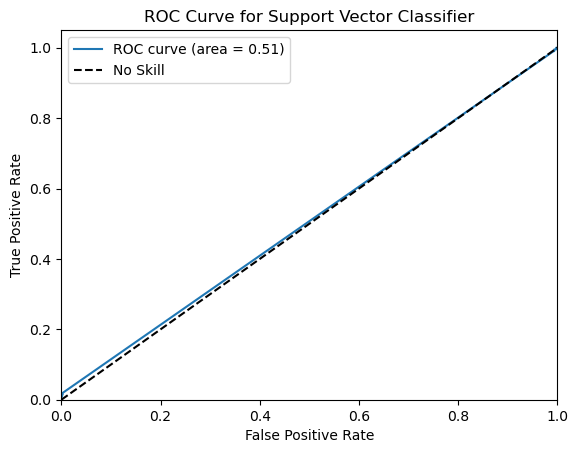

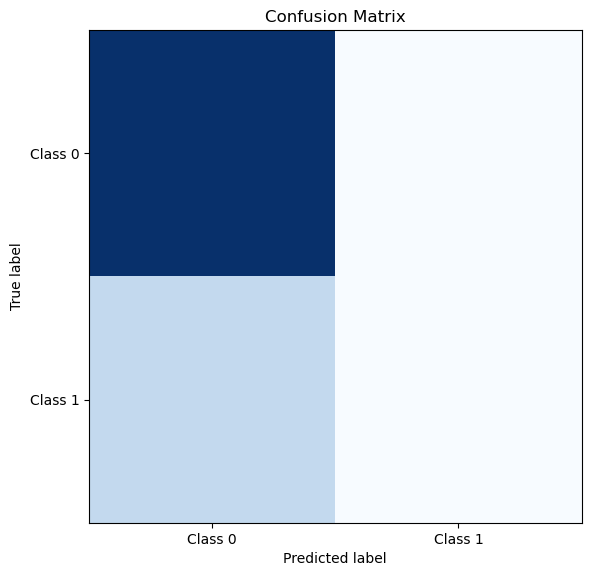

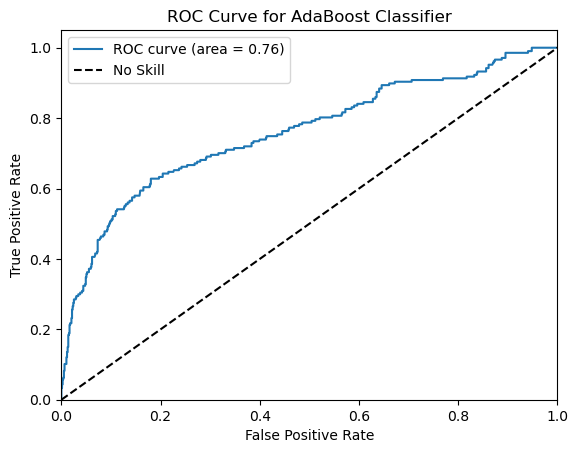

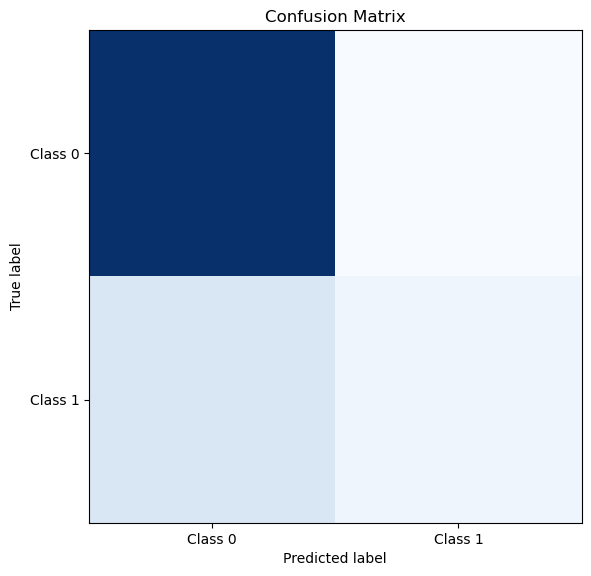

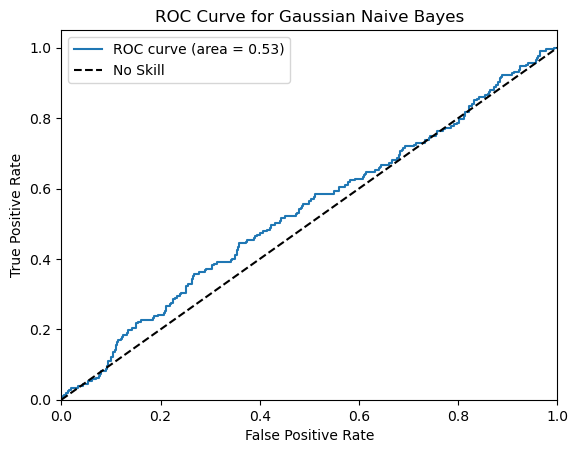

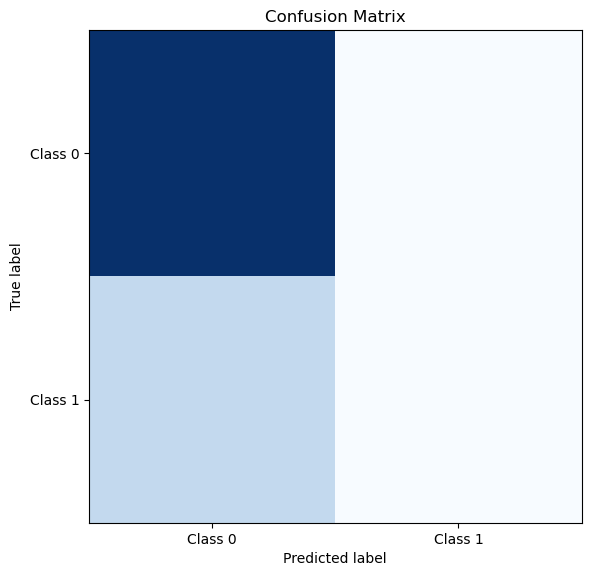

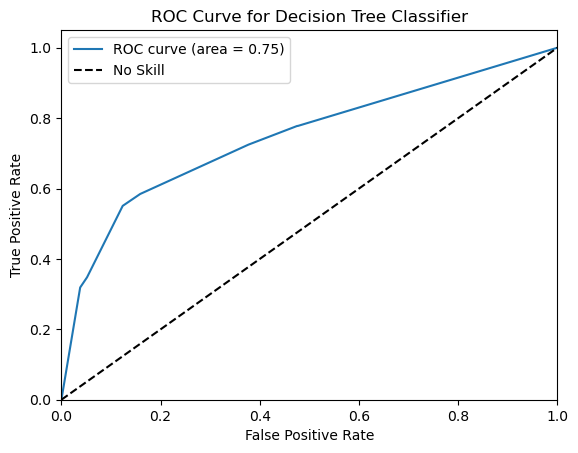

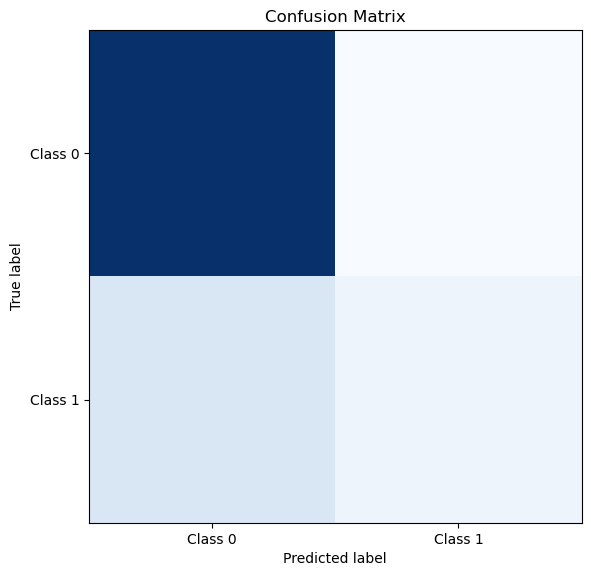

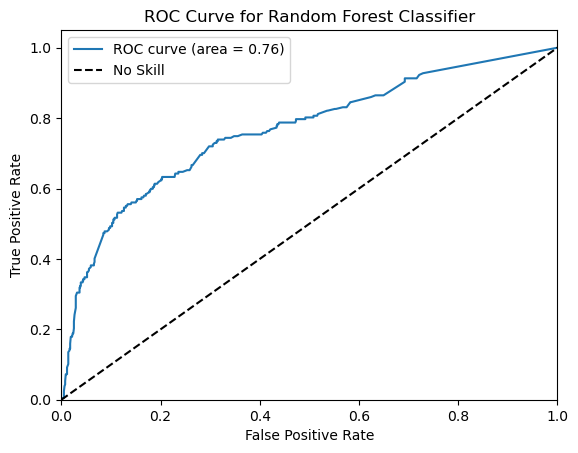

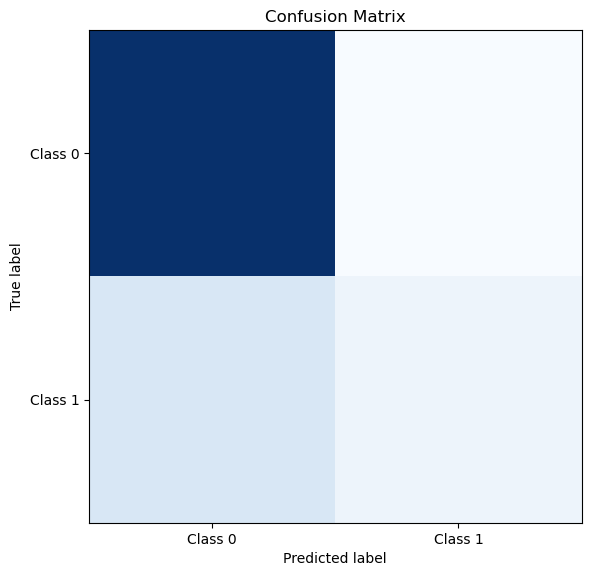

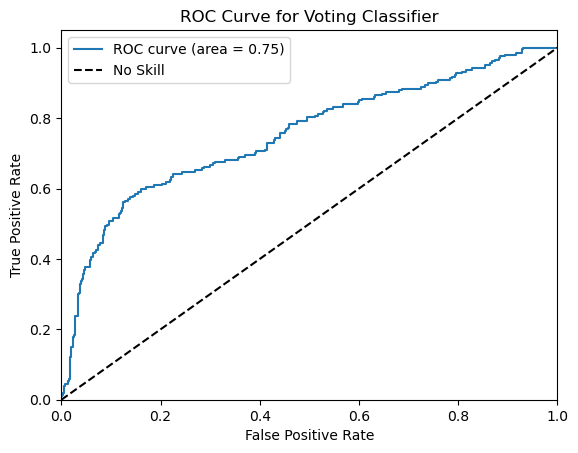

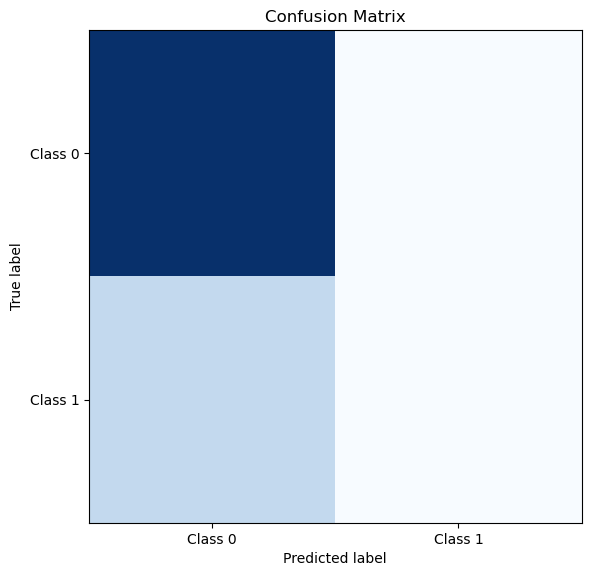

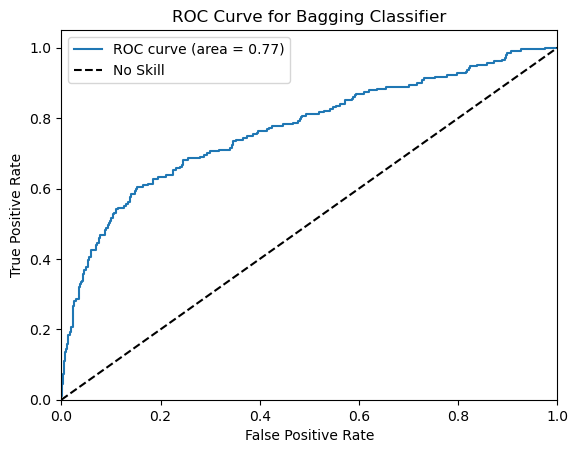

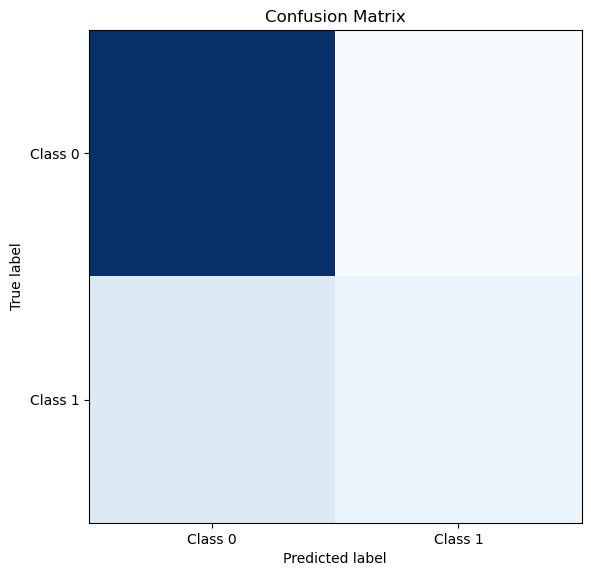

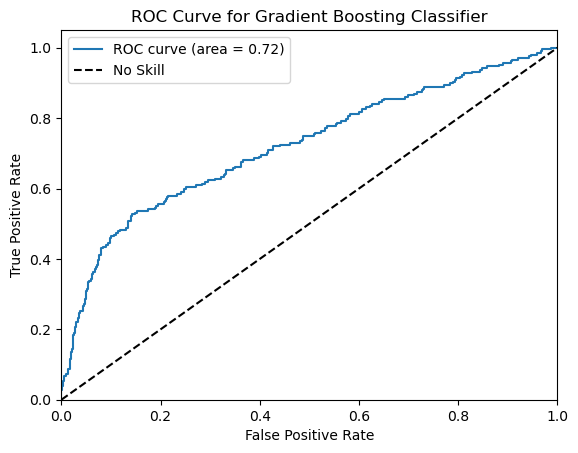

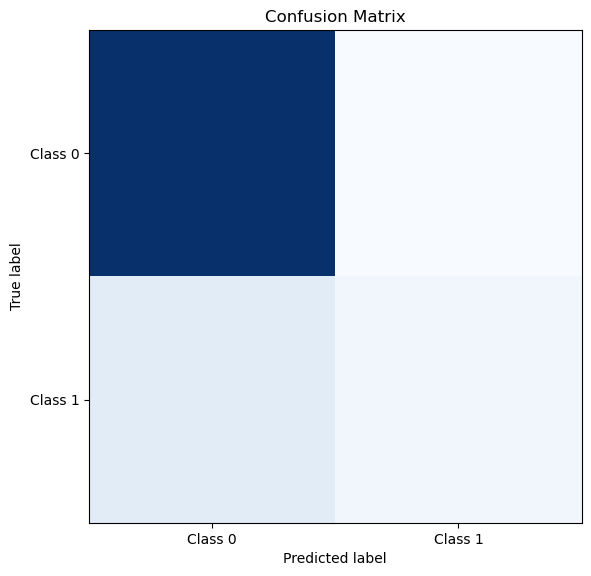

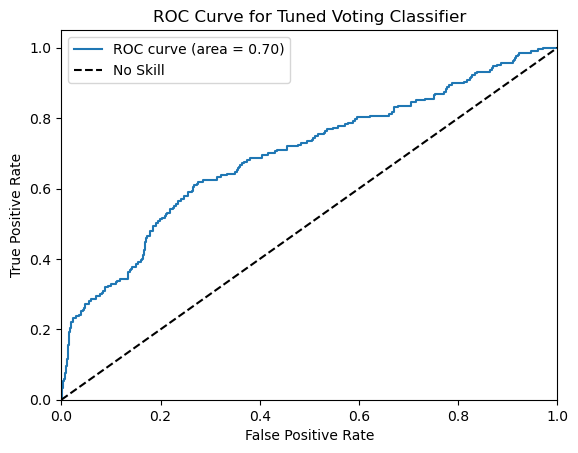

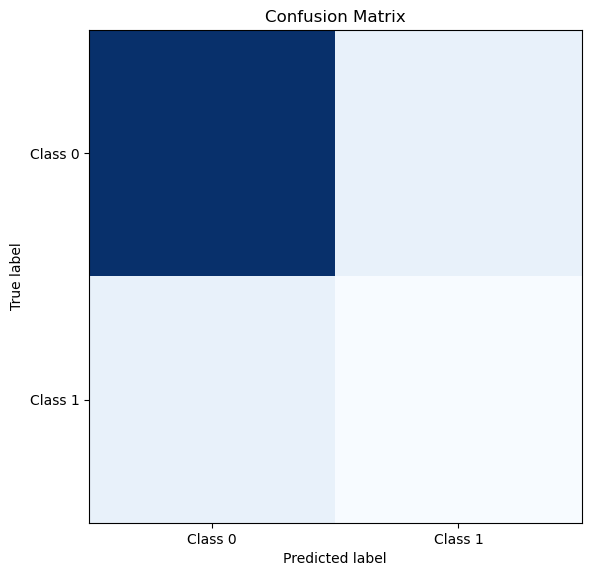

In [31]:
classifiers = [
    {'classifier_names': [svm_gridSearch, ada_clf_tuned, nb_gridSearch, dtc_gridSearch, randomForest_gridSearch, 
        vc_gridSearch, bag_clf_tuned, gbc_tuned, final_voting]
    },
    {'titles': [
        "Support Vector Classifier", "AdaBoost Classifier", "Gaussian Naive Bayes", "Decision Tree Classifier", "Random Forest Classifier",
        "Voting Classifier", "Bagging Classifier", "Gradient Boosting Classifier", "Tuned Voting Classifier"]
    }
]

for i in range(0, len(classifiers[0]['classifier_names'])):
    y_predProba = classifiers[0]['classifier_names'][i].predict_proba(X_test)[:, 1]
    y_pred = classifiers[0]['classifier_names'][i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_predProba) 
    roc_auc = auc(fpr, tpr)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + classifiers[1]['titles'][i])
    plt.legend()
    plt.savefig('./images/roc/' + classifiers[1]['titles'][i] + ' ROC' + '.png', bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest')
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(set(y_test)))
    plt.xticks(tick_marks, ['Class 0', 'Class 1'])
    plt.yticks(tick_marks, ['Class 0', 'Class 1'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('./images/cm/' + classifiers[1]['titles'][i] + " CM" + '.png', bbox_inches='tight')
    plt.show()



In [ ]:
# sns.scatterplot(data=df)

In [ ]:
# data = ['2912312', '250000', '1', '1', '2', '35', '0', '0', '0', '0', '0', '0', '70887',	'67060',	'63561',	'59696',	'56875',	'55512',	'3000',	'3000',	'3000',	'3000',	'3000',	'3000']
# newDataFrame = pd.DataFrame(data = [data], columns=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',	'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6','PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6'])
# print(nb_gridSearch.predict(newDataFrame))

In [ ]:
# K Means Clustering
# kmeans = KMeans(n_clusters=5, random_state=42, verbose=3, )
# kmeans.fit(X_train, y_train)
# kmeans_yPred = kmeans.predict(X_test)
# print(accuracy_score(y_test, kmeans_yPred))

In [ ]:
# print(accuracy_score(y_test, kmeans_yPred))

In [ ]:
# # K Means hyper parameter
# param_grid = {
#     'algorithm': ['lloyd', 'elkan'],
#     'random_state': [None, 1, 42],
#     'n_clusters': [2, 5, 8],
#     'max_iter': [300, 400, 500]
# }
# kmeans_GridSearch = GridSearchCV(KMeans(), param_grid, cv=10, verbose=3)
# kmeans_GridSearch.fit(X_train, y_train)
# kmeans_GridSearchPred = kmeans_GridSearch.predict(X_test)
# print(accuracy_score(y_test, kmeans_GridSearchPred))

In [ ]:
# print(accuracy_score(y_test, kmeans_GridSearchPred))